Text(2020-01-23 00:00:00, 2009881, 'For the USA, China, India, France, Italy, and Canada')

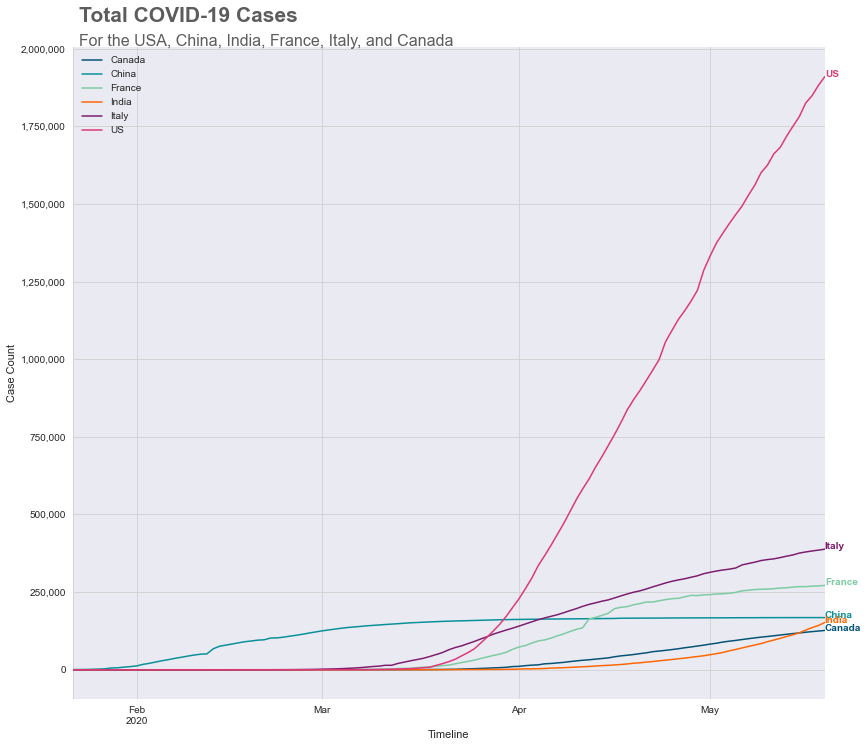

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date']) #Using Data from Git repository
countries = ['Canada','India','Italy','US','China','France'] #Countries that we want to create visualization
df = df[df['Country'].isin(countries)] #Creating a smaller Data Frame using list of our countries


df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1) #Creating a summary

df = df.pivot(index='Date', columns='Country', values='Cases') #Pivoting Data
countries = list(df.columns) 
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True) #Reseting Index
covid.columns = countries

populations = {'Canada':37664517, 'India': 1378433690 , 'Italy': 60471977 , 'US': 330548815,  'China':1438027228, 'France': 65239883,}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

colors = {'Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'India':'#ff6600', 'Italy':'#7C1D6F','US':'#DC3977' }
plt.style.use('seaborn')

plot = covid.plot(figsize=(12,12), color=list(colors.values()), linewidth=1.5, legend=True)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Timeline')
plot.set_ylabel('Case Count')

for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Section 9 - Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())+105000, s = "Total COVID-19 Cases\n", fontsize = 21, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+100000, s = "For the USA, China, India, France, Italy, and Canada", fontsize = 16, alpha = .75)